In [2]:
%load_ext autoreload
%aimport tensor_toolbox
%autoreload 1

# Fundamentals of machine learning

## Generalization: The goal of machine learning

**Listing 5.1: Adding white-noise channels or all-zeros channels to MNIST**

==================== image with noise | tensor_info ====================
Type: <class 'numpy.ndarray'>
Shape: (60000, 1568) | nDims: 2 | dtype: float64
image with noise[0]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
... (showing only the first 20 elements)

==================== image with 0s | tensor_info ====================
Type: <class 'numpy.ndarray'>
Shape: (60000, 1568) | nDims: 2 | dtype: float64
image with 0s[0]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
... (showing only the first 20 elements)

==================== image with noise | tensor_info ====================
Type: <class 'numpy.ndarray'>
Shape: (56, 28) | nDims: 2 | dtype: float64
image with noise[0]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
... (showing only the first 20 elements)


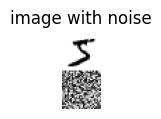


==================== image with 0s | tensor_info ====================
Type: <class 'numpy.ndarray'>
Shape: (56, 28) | nDims: 2 | dtype: float64
image with 0s[0]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
... (showing only the first 20 elements)


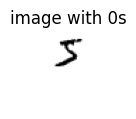

In [3]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

tensor_toolbox.tensor_info(train_images_with_noise_channels, "image with noise", image=False)
tensor_toolbox.tensor_info(train_images_with_zeros_channels, "image with 0s", image=False)

# Let's pick a sample of each and display them
image_with_noise = train_images_with_noise_channels[0]
image_with_zeros = train_images_with_zeros_channels[0]
image_with_noise = image_with_noise.reshape((-1, 28))
image_with_zeros = image_with_zeros.reshape((-1, 28))
tensor_toolbox.tensor_info(image_with_noise, "image with noise", image=True)
tensor_toolbox.tensor_info(image_with_zeros, "image with 0s", image=True)

**Listing 5.2: Training the same model on MNIST data with noise channels or all-zero channels**

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
from tqdm.keras import TqdmCallback

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    callbacks=[TqdmCallback()],
    verbose=0)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    callbacks=[TqdmCallback()],
    verbose=0)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

**Listing 5.3: Plotting a validation accuracy comparison**

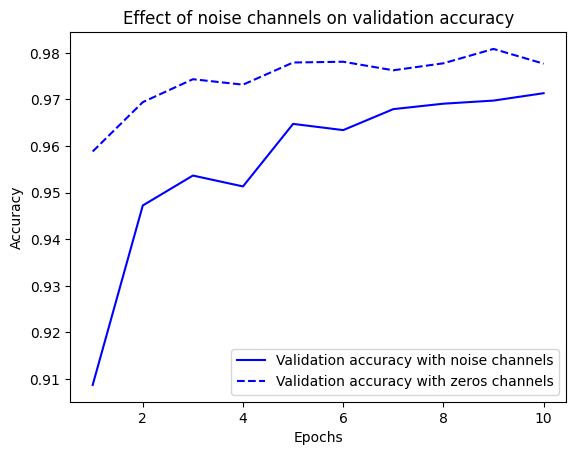

In [5]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Listing 5.4: Fitting a MNIST model with randomly shuffled labels**

In [6]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2,
          callbacks=[TqdmCallback()],
          verbose=0)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

## Improving model fit

### Tuning key gradient descent parameters

**Listing 5.5: Training a MNIST model with an incorrectly high learning rate**

In [7]:
from tqdm.keras import TqdmCallback
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.legacy.RMSprop(1.), # For Apple Silicon macs
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2,
          callbacks=[TqdmCallback()],
            verbose=0)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

**Listing 5.6: The same model with a more appropriate learning rate**

In [8]:
from tqdm.keras import TqdmCallback

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.legacy.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2,
          callbacks=[TqdmCallback()],
            verbose=0)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

### Leveraging better architecture priors

### Increasing model capacity

**Listing 5.7: A simple logistic regression on MNIST**

In [9]:
from tqdm.keras import TqdmCallback
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    callbacks=[TqdmCallback()],
    verbose=0)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

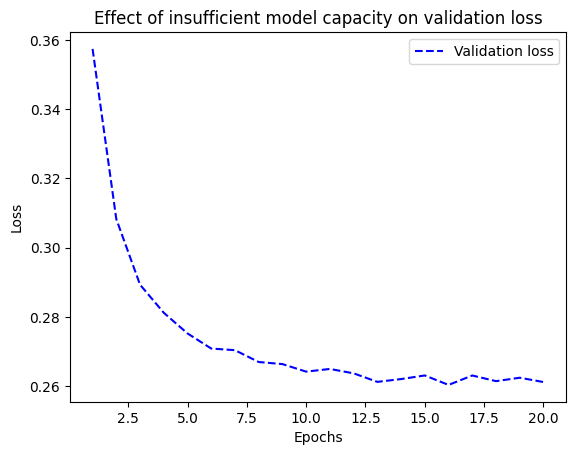

In [10]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [11]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    callbacks=[TqdmCallback()],
    verbose=0)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

## Improving generalization

**Original model**

In [24]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4,
                             callbacks=[TqdmCallback()], verbose=0)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [37]:
# Let's do the equivalent steps in PyTorch
import torch
class TorchModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.LazyLinear(16)
        self.fc2 = torch.nn.Linear(16, 16)
        self.fc3 = torch.nn.Linear(16, 1)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)
torchmodel = TorchModel()
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.RMSprop(torchmodel.parameters())
def torchtrain(train_dataloader, model, criterion, optimizer):
    model.train()
    total_loss = 0
    correct = 0
    samples = 0
    for X, y in train_dataloader:
        y_pred = torch.flatten(model(X))
        loss = criterion(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()*len(y)
        correct += (torch.sigmoid(y_pred).round() == y).sum().item()
        samples += len(y)
    return total_loss/samples, correct/samples
def torcheval(val_dataloader, model, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    samples = 0
    with torch.no_grad():
        for X, y in val_dataloader:
            y_pred = torch.flatten(model(X))
            loss = criterion(y_pred, y)
            total_loss += loss.item()*len(y)
            correct += (torch.sigmoid(y_pred).round() == y).sum().item()
            samples += len(y)
    return total_loss/samples, correct/samples
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.4)
train_dataloader = tensor_toolbox.make_dataloader([X_train], [y_train], batch_size=512)
val_dataloader = tensor_toolbox.make_dataloader([X_val], [y_val], batch_size=512)
for epoch in range(20):
    train_loss, train_acc = torchtrain(train_dataloader, torchmodel, criterion, optimizer)
    val_loss, val_acc = torcheval(val_dataloader, torchmodel, criterion)
    print(f"Epoch {epoch+1}/{20}: train_loss={train_loss:.4f}, train_acc={train_acc:.4f}, val_loss={val_loss:.4f}, val_acc={val_acc:.4f}")

Epoch 1/20: train_loss=0.6230, train_acc=0.6645, val_loss=0.5206, val_acc=0.7573
Epoch 2/20: train_loss=0.2954, train_acc=0.8828, val_loss=0.3090, val_acc=0.8775
Epoch 3/20: train_loss=0.1772, train_acc=0.9311, val_loss=0.3119, val_acc=0.8847
Epoch 4/20: train_loss=0.1156, train_acc=0.9558, val_loss=0.3502, val_acc=0.8823
Epoch 5/20: train_loss=0.0661, train_acc=0.9756, val_loss=0.4063, val_acc=0.8791
Epoch 6/20: train_loss=0.0402, train_acc=0.9853, val_loss=0.4671, val_acc=0.8790
Epoch 7/20: train_loss=0.0257, train_acc=0.9894, val_loss=0.5340, val_acc=0.8783
Epoch 8/20: train_loss=0.0173, train_acc=0.9907, val_loss=0.6006, val_acc=0.8767
Epoch 9/20: train_loss=0.0120, train_acc=0.9953, val_loss=0.6549, val_acc=0.8762
Epoch 10/20: train_loss=0.0087, train_acc=0.9974, val_loss=0.7312, val_acc=0.8726
Epoch 11/20: train_loss=0.0068, train_acc=0.9979, val_loss=0.7994, val_acc=0.8728
Epoch 12/20: train_loss=0.0052, train_acc=0.9986, val_loss=0.8752, val_acc=0.8742
Epoch 13/20: train_loss=0

**Version of the model with lower capacity**

In [38]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4,
    callbacks=[TqdmCallback()], verbose=0)


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [43]:
class TorchModelLowerCapacity(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.LazyLinear(4)
        self.fc2 = torch.nn.Linear(4, 4)
        self.fc3 = torch.nn.Linear(4, 1)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)
torchmodel_lower_capacity = TorchModelLowerCapacity()
optimizer = torch.optim.RMSprop(torchmodel_lower_capacity.parameters())
for epoch in range(20):
    train_loss, train_acc = torchtrain(train_dataloader, torchmodel_lower_capacity, criterion, optimizer)
    val_loss, val_acc = torcheval(val_dataloader, torchmodel_lower_capacity, criterion)
    print(f"Epoch {epoch+1}/{20}: train_loss={train_loss:.4f}, train_acc={train_acc:.4f}, val_loss={val_loss:.4f}, val_acc={val_acc:.4f}")

/Users/alemalvarez/.pyenv/versions/3.11.5/lib/python3.11/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 1/20: train_loss=0.5883, train_acc=0.6753, val_loss=0.3724, val_acc=0.8625
Epoch 2/20: train_loss=0.2837, train_acc=0.8969, val_loss=0.3070, val_acc=0.8804
Epoch 3/20: train_loss=0.1924, train_acc=0.9363, val_loss=0.3120, val_acc=0.8804
Epoch 4/20: train_loss=0.1329, train_acc=0.9613, val_loss=0.3424, val_acc=0.8763
Epoch 5/20: train_loss=0.1360, train_acc=0.9567, val_loss=0.3699, val_acc=0.8743
Epoch 6/20: train_loss=0.0844, train_acc=0.9799, val_loss=0.4030, val_acc=0.8727
Epoch 7/20: train_loss=0.0670, train_acc=0.9861, val_loss=0.4213, val_acc=0.8733
Epoch 8/20: train_loss=0.0574, train_acc=0.9890, val_loss=0.4578, val_acc=0.8720
Epoch 9/20: train_loss=0.0514, train_acc=0.9905, val_loss=0.4879, val_acc=0.8704
Epoch 10/20: train_loss=0.0479, train_acc=0.9913, val_loss=0.5138, val_acc=0.8697
Epoch 11/20: train_loss=0.0819, train_acc=0.9801, val_loss=0.4955, val_acc=0.8683
Epoch 12/20: train_loss=0.0479, train_acc=0.9912, val_loss=0.5331, val_acc=0.8693
Epoch 13/20: train_loss=0

**Version of the model with higher capacity**

In [44]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4,
    callbacks=[TqdmCallback()], verbose=0)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [45]:
class TorchModelHigherCapacity(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.LazyLinear(512)
        self.fc2 = torch.nn.Linear(512, 512)
        self.fc3 = torch.nn.Linear(512, 1)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)
torch_higher_capacity = TorchModelHigherCapacity()
optimizer = torch.optim.RMSprop(torch_higher_capacity.parameters())
for epoch in range(20):
    train_loss, train_acc = torchtrain(train_dataloader, torch_higher_capacity, criterion, optimizer)
    val_loss, val_acc = torcheval(val_dataloader, torch_higher_capacity, criterion)
    print(f"Epoch {epoch+1}/{20}: train_loss={train_loss:.4f}, train_acc={train_acc:.4f}, val_loss={val_loss:.4f}, val_acc={val_acc:.4f}")

/Users/alemalvarez/.pyenv/versions/3.11.5/lib/python3.11/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 1/20: train_loss=62.9260, train_acc=0.5662, val_loss=2.8373, val_acc=0.5365
Epoch 2/20: train_loss=1.3212, train_acc=0.7201, val_loss=0.3985, val_acc=0.8467
Epoch 3/20: train_loss=0.2598, train_acc=0.8917, val_loss=0.3262, val_acc=0.8643
Epoch 4/20: train_loss=0.1322, train_acc=0.9455, val_loss=0.4737, val_acc=0.8490
Epoch 5/20: train_loss=0.0777, train_acc=0.9681, val_loss=0.5029, val_acc=0.8768
Epoch 6/20: train_loss=0.0281, train_acc=0.9882, val_loss=0.7992, val_acc=0.8622
Epoch 7/20: train_loss=0.0137, train_acc=0.9941, val_loss=0.8672, val_acc=0.8737
Epoch 8/20: train_loss=0.0055, train_acc=0.9973, val_loss=1.0038, val_acc=0.8742
Epoch 9/20: train_loss=0.0026, train_acc=0.9988, val_loss=1.1642, val_acc=0.8730
Epoch 10/20: train_loss=0.0014, train_acc=0.9993, val_loss=1.2725, val_acc=0.8715
Epoch 11/20: train_loss=0.0007, train_acc=0.9997, val_loss=1.3404, val_acc=0.8723
Epoch 12/20: train_loss=0.0004, train_acc=0.9998, val_loss=1.3942, val_acc=0.8723
Epoch 13/20: train_loss=

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [46]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4,
    callbacks=[TqdmCallback()], verbose=0)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [49]:
# In PyTorch, l2 regularization is applied directly to the optimizer, like:
torchmodel_l2 = TorchModel()
optimizer = torch.optim.RMSprop(torchmodel_l2.parameters(), weight_decay=0.002)
for epoch in range(20):
    train_loss, train_acc = torchtrain(train_dataloader, torchmodel_l2, criterion, optimizer)
    val_loss, val_acc = torcheval(val_dataloader, torchmodel_l2, criterion)
    print(f"Epoch {epoch+1}/{20}: train_loss={train_loss:.4f}, train_acc={train_acc:.4f}, val_loss={val_loss:.4f}, val_acc={val_acc:.4f}")


Epoch 1/20: train_loss=0.6851, train_acc=0.5907, val_loss=0.6393, val_acc=0.5598
Epoch 2/20: train_loss=0.4984, train_acc=0.7881, val_loss=0.3633, val_acc=0.8656
Epoch 3/20: train_loss=0.3473, train_acc=0.8649, val_loss=0.3162, val_acc=0.8713
Epoch 4/20: train_loss=0.2957, train_acc=0.8841, val_loss=0.3066, val_acc=0.8747
Epoch 5/20: train_loss=0.2882, train_acc=0.8880, val_loss=0.3075, val_acc=0.8736
Epoch 6/20: train_loss=0.3050, train_acc=0.8895, val_loss=0.2996, val_acc=0.8791
Epoch 7/20: train_loss=0.2078, train_acc=0.9265, val_loss=0.3115, val_acc=0.8746
Epoch 8/20: train_loss=0.2521, train_acc=0.8997, val_loss=0.3177, val_acc=0.8729
Epoch 9/20: train_loss=0.2108, train_acc=0.9225, val_loss=0.3365, val_acc=0.8707
Epoch 10/20: train_loss=0.2430, train_acc=0.9050, val_loss=0.3977, val_acc=0.8368
Epoch 11/20: train_loss=0.2489, train_acc=0.9117, val_loss=0.3018, val_acc=0.8786
Epoch 12/20: train_loss=0.2324, train_acc=0.9234, val_loss=0.3107, val_acc=0.8735
Epoch 13/20: train_loss=0

**Different weight regularizers available in Keras**

In [27]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

In [51]:
# In PyTorch, l1 has to be coded in the training loop. An example is:
def torchtrain_l1(train_dataloader, model, criterion, optimizer, l1=0.001):
    model.train()
    total_loss = 0
    correct = 0
    samples = 0
    for X, y in train_dataloader:
        y_pred = torch.flatten(model(X))
        loss = criterion(y_pred, y) # Normal Loss function
        # Add the L1 norm of the parameters.
        # torch.linalg.norm(p, 1) computes the L1 norm of a tensor p
        l1_norm = sum(torch.linalg.norm(p, 1) for p in model.parameters())
        # Multiply it by the lambda factor and add it to the loss
        loss += l1 * l1_norm
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()*len(y)
        correct += (torch.sigmoid(y_pred).round() == y).sum().item()
        samples += len(y)
    return total_loss/samples, correct/samples
torchmodel = TorchModel()
optimizer = torch.optim.RMSprop(torchmodel.parameters())
for epoch in range(20):
    train_loss, train_acc = torchtrain_l1(train_dataloader, torchmodel, criterion, optimizer)
    val_loss, val_acc = torcheval(val_dataloader, torchmodel, criterion)
    print(f"Epoch {epoch+1}/{20}: train_loss={train_loss:.4f}, train_acc={train_acc:.4f}, val_loss={val_loss:.4f}, val_acc={val_acc:.4f}")

/Users/alemalvarez/.pyenv/versions/3.11.5/lib/python3.11/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 1/20: train_loss=0.7635, train_acc=0.7213, val_loss=0.3965, val_acc=0.8561
Epoch 2/20: train_loss=0.3123, train_acc=0.8869, val_loss=0.3415, val_acc=0.8730
Epoch 3/20: train_loss=0.1972, train_acc=0.9324, val_loss=0.3054, val_acc=0.8848
Epoch 4/20: train_loss=0.1164, train_acc=0.9649, val_loss=0.4141, val_acc=0.8659
Epoch 5/20: train_loss=0.1086, train_acc=0.9689, val_loss=0.3734, val_acc=0.8514
Epoch 6/20: train_loss=0.0681, train_acc=0.9838, val_loss=0.4422, val_acc=0.8811
Epoch 7/20: train_loss=0.0403, train_acc=0.9912, val_loss=0.5057, val_acc=0.8794
Epoch 8/20: train_loss=0.0292, train_acc=0.9949, val_loss=0.5627, val_acc=0.8759
Epoch 9/20: train_loss=0.0226, train_acc=0.9974, val_loss=0.6285, val_acc=0.8750
Epoch 10/20: train_loss=0.0186, train_acc=0.9982, val_loss=0.6820, val_acc=0.8740
Epoch 11/20: train_loss=0.0157, train_acc=0.9985, val_loss=0.7377, val_acc=0.8724
Epoch 12/20: train_loss=0.0138, train_acc=0.9987, val_loss=0.7958, val_acc=0.8725
Epoch 13/20: train_loss=0

#### Adding dropout

**Adding dropout to the IMDB model**

In [52]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4,
    callbacks=[TqdmCallback()], verbose=0)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [53]:
class TorchModelWithDropout (torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.LazyLinear(16)
        self.dropout1 = torch.nn.Dropout(0.5)
        self.fc2 = torch.nn.LazyLinear(16)
        self.dropout2 = torch.nn.Dropout(0.5)
        self.fc3 = torch.nn.LazyLinear(1)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        return self.fc3(x)
torchmodel_dropout = TorchModelWithDropout()
optimizer = torch.optim.RMSprop(torchmodel_dropout.parameters())
for epoch in range(20):
    train_loss, train_acc = torchtrain(train_dataloader, torchmodel_dropout, criterion, optimizer)
    val_loss, val_acc = torcheval(val_dataloader, torchmodel_dropout, criterion)
    print(f"Epoch {epoch+1}/{20}: train_loss={train_loss:.4f}, train_acc={train_acc:.4f}, val_loss={val_loss:.4f}, val_acc={val_acc:.4f}")
# Big win for dropot layers!

/Users/alemalvarez/.pyenv/versions/3.11.5/lib/python3.11/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch 1/20: train_loss=0.7299, train_acc=0.5826, val_loss=0.4517, val_acc=0.8684
Epoch 2/20: train_loss=0.5081, train_acc=0.7510, val_loss=0.3286, val_acc=0.8779
Epoch 3/20: train_loss=0.4139, train_acc=0.8182, val_loss=0.3624, val_acc=0.8564
Epoch 4/20: train_loss=0.3491, train_acc=0.8482, val_loss=0.3139, val_acc=0.8858
Epoch 5/20: train_loss=0.3159, train_acc=0.8607, val_loss=0.2976, val_acc=0.8780
Epoch 6/20: train_loss=0.2798, train_acc=0.8689, val_loss=0.3170, val_acc=0.8752
Epoch 7/20: train_loss=0.2488, train_acc=0.8767, val_loss=0.3564, val_acc=0.8812
Epoch 8/20: train_loss=0.2297, train_acc=0.8844, val_loss=0.3980, val_acc=0.8826
Epoch 9/20: train_loss=0.2079, train_acc=0.8905, val_loss=0.4505, val_acc=0.8773
Epoch 10/20: train_loss=0.2002, train_acc=0.8894, val_loss=0.4725, val_acc=0.8795
Epoch 11/20: train_loss=0.1797, train_acc=0.9032, val_loss=0.5722, val_acc=0.8815
Epoch 12/20: train_loss=0.1783, train_acc=0.9032, val_loss=0.4538, val_acc=0.8778
Epoch 13/20: train_loss=0